In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df=pd.read_csv("iris.csv")

In [3]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [5]:
df.duplicated().sum()

3

In [6]:
df.drop_duplicates(inplace=True)

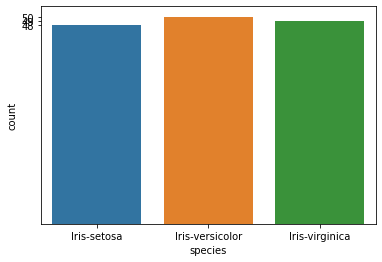

In [7]:
sb.countplot(data=df,x='species')
f=df['species'].value_counts()
plt.yticks(f)
plt.show()
#so the data is balanced

In [8]:
#apply label encoder on species
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])

In [9]:
#select input adnd outut
x=df.drop('species',axis=1)
y=df['species']

In [10]:
#split the data
from sklearn.model_selection import train_test_split
#creating objetc of train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [11]:
#applying standarad scaler on input
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [12]:
#create a function 
def create_model(model):#model uset define which hold the object of algo
    #train the model with 70%
    model.fit(x_train,y_train)
    #test the mdoel with 30 % data
    y_pred=model.predict(x_test)
    #generate report
    from sklearn.metrics import confusion_matrix,classification_report
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    return model

# perform logistic regression

In [13]:
#perform logitic model:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [14]:
#create a model
lr=create_model(lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

[[15  0  0]
 [ 0 15  1]
 [ 0  2 12]]


In [15]:
#here all the output are imp so accuracy will be of f1 score
#here the accuracy is 0-100% 1-91% and 2-89%

# perform Decision trees classifier

In [16]:
#performing decision tree classifier wiht deafult a sgini index
from sklearn.tree import DecisionTreeClassifier

In [17]:
#create a object
dct=DecisionTreeClassifier()

In [18]:
dct=create_model(dct)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

[[15  0  0]
 [ 0 15  1]
 [ 0  2 12]]


In [19]:
#here we get the accuracy as 0-100 1-91 and 2-89

In [20]:
#check important features means check information gain of each input
dct.feature_importances_

array([0.0196135 , 0.02206519, 0.04235444, 0.91596687])

In [21]:
dict={'Input':x.columns,"IG":dct.feature_importances_}
df1=pd.DataFrame(dict)
df1.sort_values(by='IG',ascending=False,ignore_index=True)#sorting the value in descending order
#disadvantage of dct is that if there is little bit og ig is there then it will take that ig into consideration

,Input,IG
0,petal_width,0.915967
1,petal_length,0.042354
2,sepal_width,0.022065
3,sepal_length,0.019613


# to avoid overfitting in DCT use pruning tehcnique in gini index:


In [22]:
#using first method as max_depth:
'''for i in range(1,9):
    dct1=DecisionTreeClassifier(random_state=1,max_depth=i)
    print("Max depth ",i)
    dct1=create_model(dct1)'''
dct1=DecisionTreeClassifier(random_state=1,max_depth=3)
dct1=create_model(dct1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        16
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 15  1]
 [ 0  0 14]]


In [23]:
#by pruning technique the accuracy is increase 0-100% 1-97 and 2-97

In [24]:
#second pruningtechnique of DCT
#2. min_samples_leaf : inbuilt parameter of DecisionTreeClassifier
#create object of DTC classifier and passing the argumenats(parameter)
#we are using this to reduce overfitting of the model
'''for i in range(45,101):
    dct2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print("min samples",i)
    dct2=create_model(dt2)'''
dct2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45)

In [25]:
#check important features means check information gain of each input
dct.feature_importances_

array([0.0196135 , 0.02206519, 0.04235444, 0.91596687])

In [26]:
dct2=create_model(dct2)

              precision    recall  f1-score   support

           0       0.56      1.00      0.71        15
           1       0.00      0.00      0.00        16
           2       0.72      0.93      0.81        14

    accuracy                           0.62        45
   macro avg       0.43      0.64      0.51        45
weighted avg       0.41      0.62      0.49        45

[[15  0  0]
 [11  0  5]
 [ 1  0 13]]


C:\Users\KUNAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KUNAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KUNAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

# use entropy

In [27]:

#passing the parameter ='entropy' by default ='giniindex' if not specified 
dct=DecisionTreeClassifier(random_state=1,criterion='entropy')
#not applied pruning technique

In [28]:
#call the function
dct=create_model(dct)
#here we get the accuracy as 0-100 1-91 and 2-89

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

[[15  0  0]
 [ 0 15  1]
 [ 0  2 12]]


In [29]:
#using first method as max_depth:
'''for i in range(1,9):
    dct1=DecisionTreeClassifier(random_state=1,max_depth=i)
    print("Max depth ",i)
    dct1=create_model(dct1)'''
dct1=DecisionTreeClassifier(random_state=1,max_depth=3,criterion='entropy')
dct1=create_model(dct1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        16
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 15  1]
 [ 0  0 14]]


In [30]:
#second pruningtechnique of DCT
#2. min_samples_leaf : inbuilt parameter of DecisionTreeClassifier
#create object of DTC classifier and passing the argumenats(parameter)
#we are using this to reduce overfitting of the model
'''for i in range(45,101):
    dct2=DecisionTreeClassifier(random_state=1,min_samples_leaf=i)
    print("min samples",i)
    dct2=create_model(dt2)'''
dct2=DecisionTreeClassifier(random_state=1,min_samples_leaf=45,criterion='entropy')
dct2=create_model(dct2)

              precision    recall  f1-score   support

           0       0.56      1.00      0.71        15
           1       0.00      0.00      0.00        16
           2       0.72      0.93      0.81        14

    accuracy                           0.62        45
   macro avg       0.43      0.64      0.51        45
weighted avg       0.41      0.62      0.49        45

[[15  0  0]
 [11  0  5]
 [ 1  0 13]]


C:\Users\KUNAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KUNAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KUNAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [31]:
#after applying second pruning technique on model and we get the acccuracy as 0-71 and 2-81

# Ensembling Technique

# random forest classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier 

In [33]:
#create a object of Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=10,max_features=4,random_state=1)
#n_estimators means take how many decision tree should be taken
#min tree=10 and max tree should be 100
'''for i in range(4,1,-1):
    rfc=RandomForestClassifier(random_state=1,n_estimators=10,max_features=i)
    print("No of features ",i)
    #call a function
    rfc=create_model(rfc)'''
rfc=create_model(rfc)
#by default it has taken gini index

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        16
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 15  1]
 [ 0  0 14]]


In [34]:
#using random forest claasifier we get the accuracy as 0-100% 1-97% 2-97%

# #ada boost

In [35]:
from sklearn.ensemble import AdaBoostClassifier

In [36]:
#create a object
#n_estimator mean no of decsionstump and it should <=100
#12 mean sno of input columns
'''for i in range(1,101):
    ada=AdaBoostClassifier(n_estimators=i,random_state=1)
    print("No of decision stump",i)
    #call function:
    ada=create_model(ada)'''

ada=AdaBoostClassifier(n_estimators=4,random_state=1)
ada=create_model(ada)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

[[15  0  0]
 [ 0 15  1]
 [ 0  1 13]]


In [37]:
#using ada boost classifer we get the accuracy as 0-100% 1-94 and 2-93% which is good

# gradient bosting:
#.2 Gradient Boosting(GB) : - 

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:

'''for i in range(10,101):
    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)
    print("No of estimator",i)
    gbc=create_model(gbc)
#all features and all data'''
gbc=GradientBoostingClassifier(n_estimators=10,random_state=1)

gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

[[15  0  0]
 [ 0 15  1]
 [ 0  2 12]]


In [40]:
##the accuracy  we get  using gradient boosting as  0-100% 1-91% 2-89%  which is good but can be better using strmer gradient boosting

# Extreme Gradient Boosting

In [41]:
!pip install xgboost


[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
from xgboost import XGBClassifier 

In [43]:
'''xgb=XGBClassifier(n_estimators=10,random_state=1,reg_alpha=1)
#here reg_aplha=1 means yes we want ot handle overfitting and reg men regularegularisation 
#alpha and lambda is hyperparameter
xgb=create_model(xgb)'''
for i in range(10,101):
    xgb=XGBClassifier(n_estimators=i,random_state=1,reg_alpha=1)
    print("No of estimator",i)
    xgb=create_model(xgb)

No of estimator 10
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

[[15  0  0]
 [ 0 15  1]
 [ 0  2 12]]
No of estimator 11
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

[[15  0  0]
 [ 0 15  1]
 [ 0  2 12]]
No of estimator 12
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        1

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

[[15  0  0]
 [ 0 15  1]
 [ 0  2 12]]
No of estimator 31
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

[[15  0  0]
 [ 0 15  1]
 [ 0  2 12]]
No of estimator 32
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1     

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

[[15  0  0]
 [ 0 15  1]
 [ 0  2 12]]
No of estimator 51
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

[[15  0  0]
 [ 0 15  1]
 [ 0  2 12]]
No of estimator 52
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1     

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

[[15  0  0]
 [ 0 15  1]
 [ 0  2 12]]
No of estimator 71
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

[[15  0  0]
 [ 0 15  1]
 [ 0  2 12]]
No of estimator 72
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1     

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

[[15  0  0]
 [ 0 15  1]
 [ 0  2 12]]
No of estimator 91
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

[[15  0  0]
 [ 0 15  1]
 [ 0  2 12]]
No of estimator 92
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1     

In [44]:
##the accuracy  we get  using  xtreme gradient boosting as  0-100% 1-91% 2-89%  which is good 

# support vector machine

In [45]:
#1. Linear Separable data means Linear Kernal
#call inbuilt class 
from sklearn.svm import LinearSVC

In [46]:
#create the object of LinearSVC class
svc=LinearSVC(random_state=1) 

In [47]:
#call function 
svc=create_model(svc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.88      0.88        16
           2       0.86      0.86      0.86        14

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45

[[15  0  0]
 [ 0 14  2]
 [ 0  2 12]]


In [48]:
#without adding any error we geth the accuracy as 0-100% 1-88% 2-86 which is good but not best as com[pared to other alogrithm


In [49]:
#create object of LinearSVC class and add some external error 
svc1=LinearSVC(random_state=1,C=0.001)


In [50]:
svc1=create_model(svc1)
#here the accuracy is not increasing after adding error 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.89      0.50      0.64        16
           2       0.62      0.93      0.74        14

    accuracy                           0.80        45
   macro avg       0.84      0.81      0.79        45
weighted avg       0.84      0.80      0.79        45

[[15  0  0]
 [ 0  8  8]
 [ 0  1 13]]



# 
# Non-linear data
#1.polynomial kernel function

In [51]:
#SVC-support vector classifier 
from sklearn.svm import SVC

In [52]:
#create  a object and specifying whcih kernel function should be passed in parameter
svc1=SVC(random_state=1,kernel='poly')
#call function 
svc1=create_model(svc1)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.80      1.00      0.89        16
           2       1.00      0.71      0.83        14

    accuracy                           0.91        45
   macro avg       0.93      0.90      0.91        45
weighted avg       0.93      0.91      0.91        45

[[15  0  0]
 [ 0 16  0]
 [ 0  4 10]]


In [53]:
#the accuracy  we gt using ply svc as 0-100% 1-89% 2-83% 

In [54]:
#creat eobjet of sc of rdail basis kernel function
svc2=SVC(random_state=1,kernel='rbf')
svc2=create_model(svc2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

[[15  0  0]
 [ 0 15  1]
 [ 0  2 12]]


In [55]:
#the accuracy  we gt using radial svc as 0-100% 1-91% 2-89% so our data set is radially distributed 

# performing kNN alogrithm

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
KNC=KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
#p=2 means Euclidean distance means sqrt(x2-x1)*2+(y2-y1)*2
#n_neighbors means k means select minimum point (always odd)
#best value of k=5
#we can increase the n_neighbors value as  5 and 7 not 6

In [58]:
KNC=create_model(KNC)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

[[15  0  0]
 [ 0 15  1]
 [ 0  1 13]]


In [59]:
# so the accuracy we get at n_nighbors=7 is 0-100% 1-94% 2-93% which is good

In [ ]:
#conclusion : in this data set .from all the classification we get best accuracy in  random forst classifier as 0-100% 1-97% 2-97%